# Exploring other types of plots for temporal data

- Calender plot 
- Polar bar chart
- Time series
- Reflection

## Load the Dataset & Aggregate Crimes by Date

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ensure Python can find clean_crime_data.py
sys.path.append("Clean-Crime_Data")  # Adjust based on folder structure

from clean_crime_data import clean_crime_data  # Import the function

# Load the cleaned dataset (Update path if needed)
file_path = "Data/SF_Crime_Data_Cleaned.csv"
df = pd.read_csv(file_path, parse_dates=["Incident Date"])

# Clean and filter data using the function
df_focus = clean_crime_data(df)

# Convert "Incident Time" to extract hours
df_focus["Incident Time"] = pd.to_datetime(df_focus["Incident Time"], format="%H:%M", errors="coerce").dt.hour

# Now df_focus is ready for analysis!
print("Unique Crime Categories in df_focus:", df_focus["Incident Category"].unique())  # Check cleaned categories
df_focus.head()


Unique Crime Categories in df_focus: ['ROBBERY' 'VEHICLE THEFT' 'ASSAULT' 'TRESPASS' 'BURGLARY' 'LARCENY/THEFT'
 'DRUG/NARCOTIC' 'VANDALISM' 'WEAPON LAWS' 'PROSTITUTION'
 'DISORDERLY CONDUCT' 'DRUNKENNESS' 'DRIVING UNDER THE INFLUENCE'
 'STOLEN PROPERTY']


,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Description,Police District,Latitude,Longitude
0,2004-11-22,17,Monday,ROBBERY,"ROBBERY, BODILY FORCE",INGLESIDE,37.708311,-122.420084
1,2005-10-18,20,Tuesday,VEHICLE THEFT,STOLEN AUTOMOBILE,PARK,90.000000,-120.500000
2,2004-02-15,2,Sunday,VEHICLE THEFT,STOLEN AUTOMOBILE,SOUTHERN,90.000000,-120.500000
4,2010-11-21,17,Sunday,ASSAULT,BATTERY,SOUTHERN,37.770913,-122.410541
5,2013-04-02,15,Tuesday,ASSAULT,BATTERY,TARAVAL,37.745158,-122.470366


## Calendar plot 

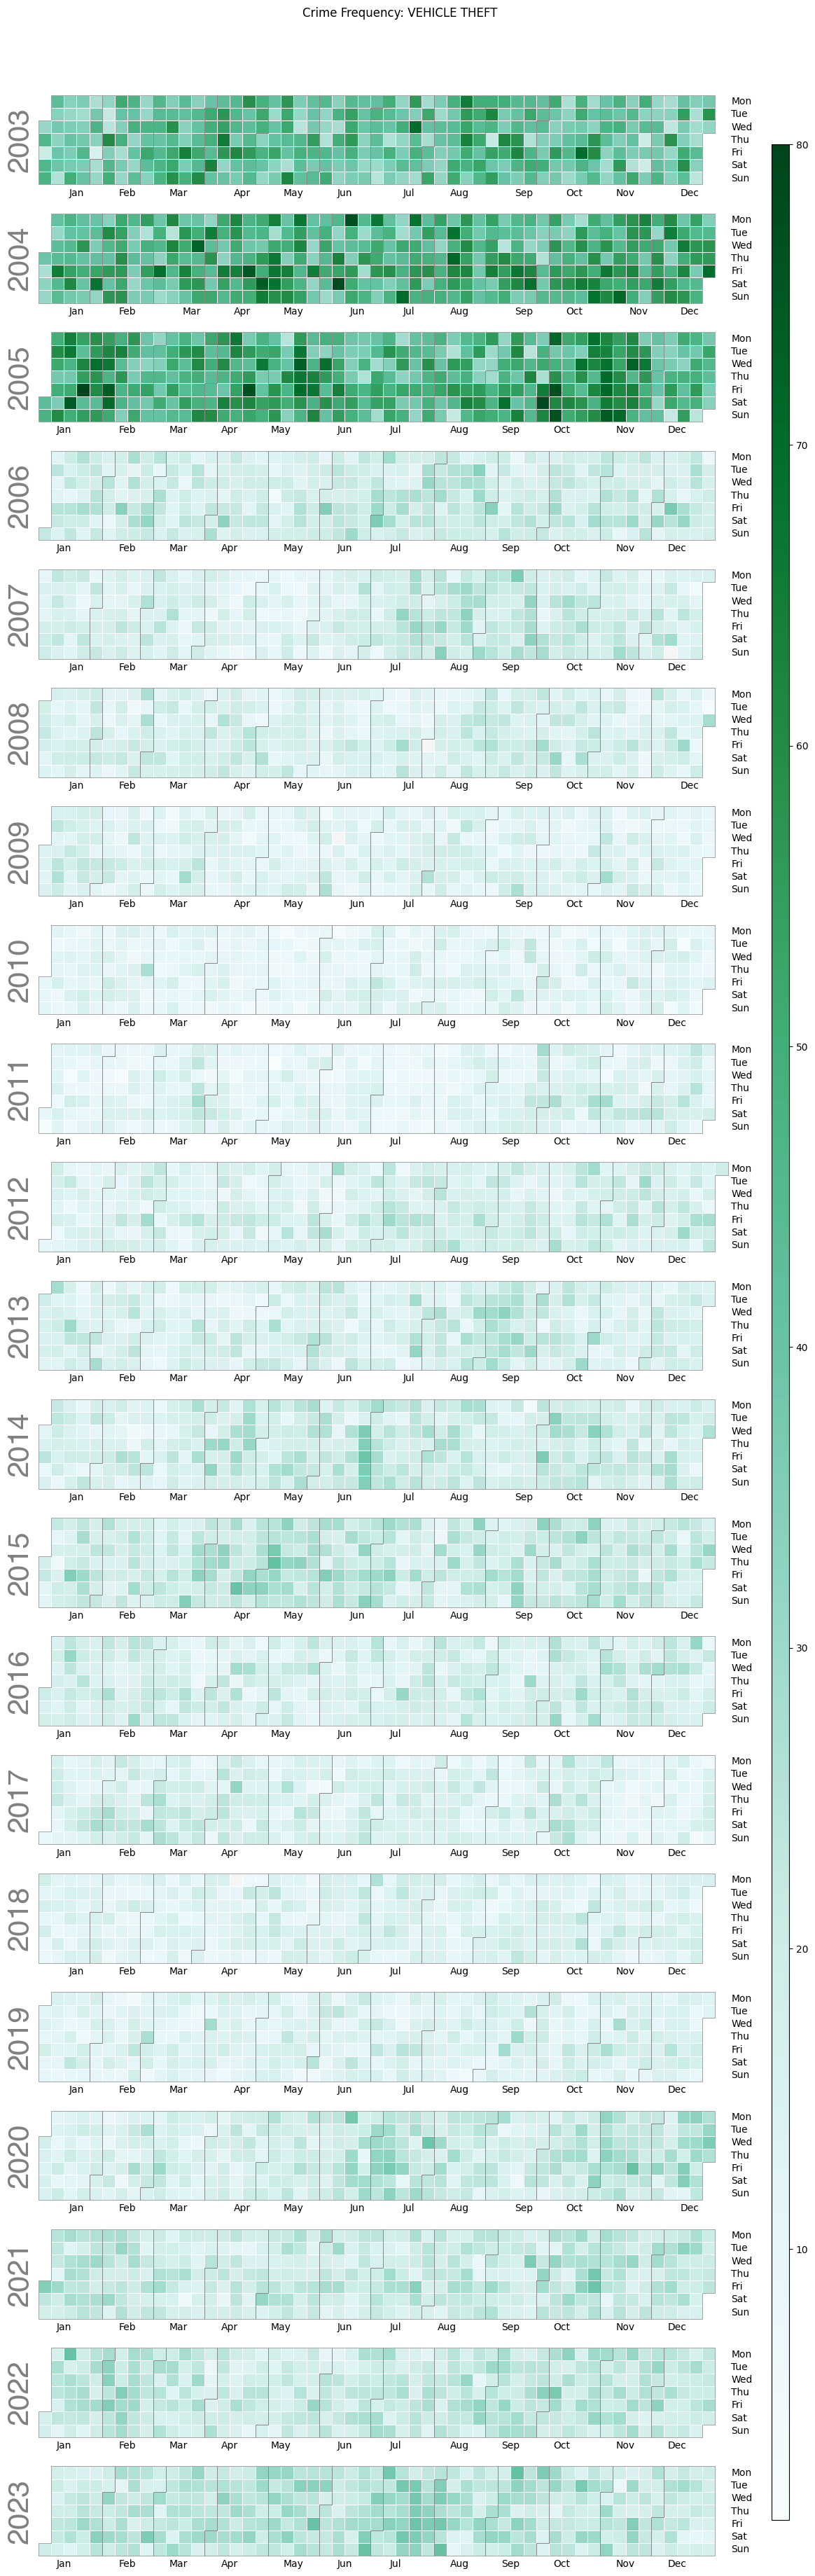

In [14]:
import calplot
# Select a specific crime type 
crime_type = "VEHICLE THEFT" 

# Aggregate crime counts per day
crime_daily = df_focus[df_focus["Incident Category"] == crime_type].groupby("Incident Date").size()

# Plot the calendar heatmap
calplot.calplot(crime_daily, cmap="BuGn", colorbar=True, suptitle=f"Crime Frequency: {crime_type}", linewidth=0.5, dropzero=True, edgecolor="gray")

# Show the plot
plt.show()

Based on the calendar plot, it can be seen that in San Francisco from 2003 to 2023 highlights a striking trend. The years 2003 to 2005 show a significantly higher frequency of vehicle thefts compared to the following years, with crime rates appearing consistently high throughout these years. However, from 2006 onwards, there is a noticeable decline, with thefts becoming less frequent and relatively stable after 2010 than the early 2000. However it is noted that it gets a little worse than in 2020 and after then 2010 but it is no why near the amount it was in the early to midt 2000s.  

## Polar bar chart

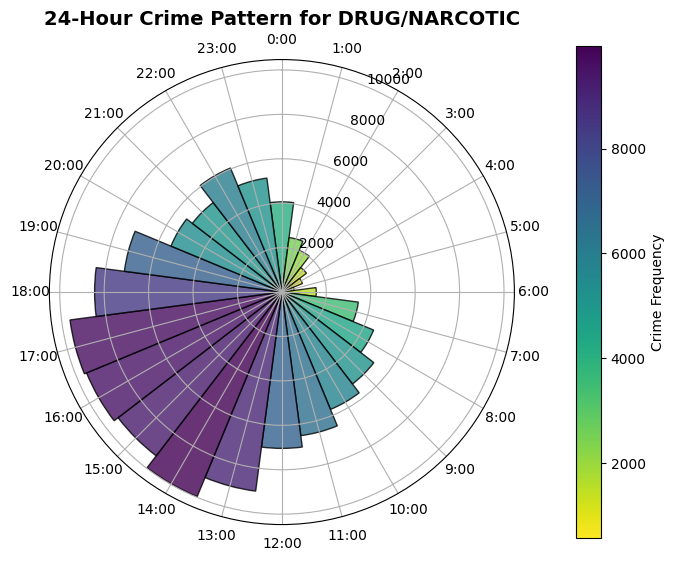

In [16]:
import numpy as np
import matplotlib.cm as cm

# Select a specific crime type
crime_type = "DRUG/NARCOTIC"  

# Filter dataset for the selected crime
df_crime = df_focus[df_focus["Incident Category"] == crime_type]

# Aggregate crime counts per hour
crime_hourly = df_crime["Incident Time"].value_counts().sort_index()

# Convert hours (0-23) into radians for the polar plot
angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  

# Create the polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Normalize crime data for color mapping
norm = plt.Normalize(vmin=crime_hourly.min(), vmax=crime_hourly.max())
colors = cm.viridis_r(norm(crime_hourly))

# Bar chart in polar coordinates
bars = ax.bar(angles, crime_hourly, width=np.pi/12, bottom=0, color=colors, alpha=0.8, edgecolor="black")

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cm.viridis_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label("Crime Frequency")

# Format the polar plot
ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)  
ax.set_xticks(angles)  
ax.set_xticklabels([f"{h}:00" for h in range(24)])  

# Add title
ax.set_title(f"24-Hour Crime Pattern for {crime_type}", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


Based on the polar plot it is revealed the that drug/narcotic related crimes peak between 1 PM and 6 PM, with frequencies ranging between 8000 and 9000 incidents. This suggests increased drug activity during the late afternoon and early evening. In contrast, crime occurrences are significantly lower during the early morning hours (midnight to 6 AM), as indicated by the lighter-colored and smaller bars.